# Data manipulation and plots

In this Jupyter notebook we plot the amplification factor data for test bosonic waves in a deformed-Kerr background by using [`pandas`](https://pandas.pydata.org/) for data manipulation and [`matplotlib`](https://matplotlib.org/) for plots. Data are freely available in our repository.

The `AmplificationFactors` class' methods and attributes are described [here](AmplificationFactors-README.md).

In [1]:
from AmplificationFactors import AmplificationFactors
import pandas as pd
import matplotlib.pyplot as plt

**Note.** In the plots below we show superradiant modes only for selected values of the black-hole parameters. It is straighforward to modify the notebook to visualize the other modes and/or choose other parameter values.

## Table of contents

1. [Amplification factors for massless bosonic waves](#1.-Amplification-factors-for-massless-bosonic-waves)
    * 1.1 [Scalar waves](#1.1-Scalar-waves)
        - [Spectra for the s=0, l=1, m=1 mode](#Spectra-for-the-s=0,-l=1,-m=1-mode)
        - [Spectra for the s=0, l=2, m=2 mode](#Spectra-for-the-s=0,-l=2,-m=2-mode)
        - [Spectra for the s=0, l=2, m=1 mode](#Spectra-for-the-s=0,-l=2,-m=1-mode)
    * 1.2 [Electromagnetic waves](#1.2-Electromagnetic-waves)
        - [Spectra for the s=1, l=1, m=1 mode](#Spectra-for-the-s=1,-l=1,-m=1-mode)
        - [Spectra for the s=1, l=2, m=2 mode](#Spectra-for-the-s=1,-l=2,-m=2-mode)
        - [Spectra for the s=1, l=2, m=1 mode](#Spectra-for-the-s=1,-l=2,-m=1-mode)
    * 1.3 [Hierarchy among different superradiant modes](#1.3-Hierarchy-among-different-superradiant-modes)
    * 1.4 [Superspinning black holes](#1.4-Superspinning-black-holes)
    * 1.5 [Maximum of the amplification factor as a function of the deformation parameter &eta;](#1.5-Maximum-of-the-amplification-factor-as-a-function-of-the-deformation-parameter-η)
    * 1.6 [Integral of the amplification factor in the superradiant region](#1.6-Integral-of-the-amplification-factor-in-the-superradiant-region)
2. [Amplification factors for massive scalar waves](#2.-Amplification-factors-for-massive-scalar-waves)
    * 2.1 [Spectra for the s=0, l=1, m=1 mode](#2.1-Spectra-for-the-s=0,-l=1,-m=1-mode)
    * 2.2 [Maximum of the amplification factor as a function of the deformation parameter &eta;](#2.2-Maximum-of-the-amplification-factor-as-a-function-of-the-deformation-parameter-η)
3. [Degeneracy of superradiant spectra for scalar waves](#3.-Degeneracy-of-superradiant-spectra-for-scalar-waves)

# 1. Amplification factors for massless bosonic waves

Massless data are organised as

| a/M | &eta;/M<sup>3</sup> | M &omega; | Z |
|-----|---------------------|-----------|---|
|...|...|...|...|

where M, a and &eta; are the mass, the spin parameter and the deformation parameter of the black hole; &omega; is the frequency of the bosonic wave, and Z the amplification factor.

&eta; = 0 corresponds to the Kerr spacetime.

We have simulated superradiant spectra for the following values of the spin parameter a/M,

<p style="text-align: center;">{0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.998, 1, 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.15}.</p>

**Note.** In the non-rotating limit, i.e. a/M = 0, Z is the absorption factor.

For each value of a/M we give values of &eta;/M<sup>3</sup> in the range [&eta;<sub>-</sub>/M<sup>3</sup>,1] with &eta;<sub>-</sub> = <sup>2</sup>&frasl;<sub>27</sub>[9Ma<sup>2</sup> - 8M<sup>3</sup> - (4M<sup>2</sup>-3a<sup>2</sup>)<sup>3/2</sup>].  
For instance, for a/M = 0.9, &eta;/M<sup>3</sup> has values

<p style="text-align: center;">{-0.198301, -0.15, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}.</p>

Frequency values are typically in the range [0,2|m|&Omega;<sub>0</sub>], being &Omega;<sub>0</sub> the angular velocity at the event horizon and m the azimuthal number.

## 1.1 Scalar waves

Import the s=0 data:

In [2]:
mode011 = AmplificationFactors(0, 1, 1)
mode022 = AmplificationFactors(0, 2, 2)
mode021 = AmplificationFactors(0, 2, 1)

## Spectra for the s=0, l=1, m=1 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

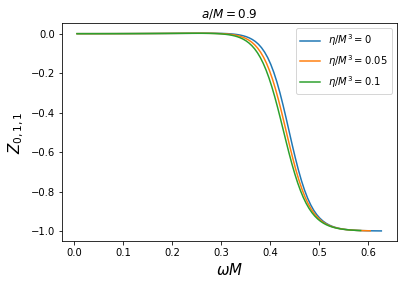

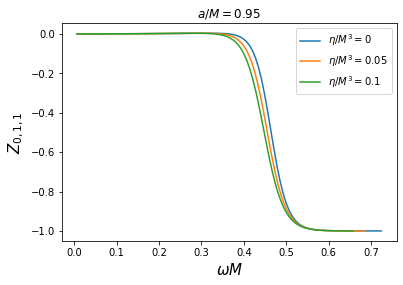

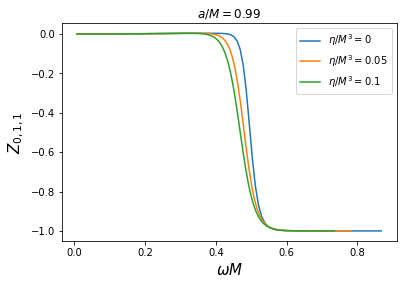

In [3]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode011.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

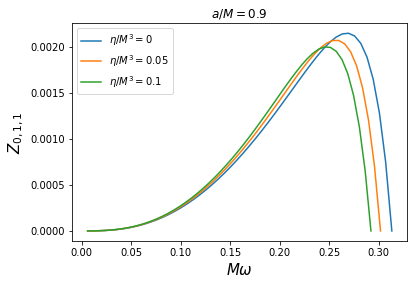

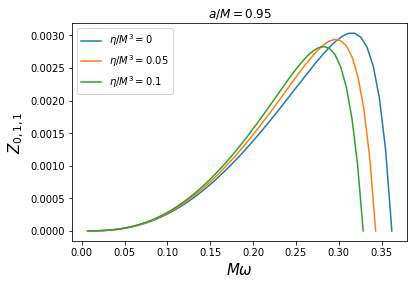

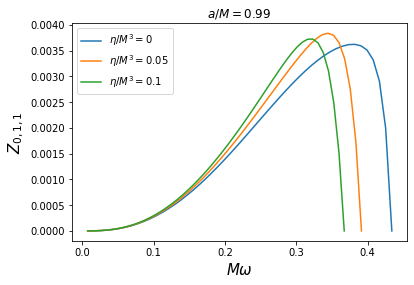

In [4]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode011.select_data_eta(eta, mode011.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode011.s, mode011.l, mode011.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

Depending on the values of the parameters, the superradiant region can change significantly. In fact the maximum position and amplitude vary with &eta; and a, as does the frequency threshold.

## Spectra for the s=0, l=2, m=2 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

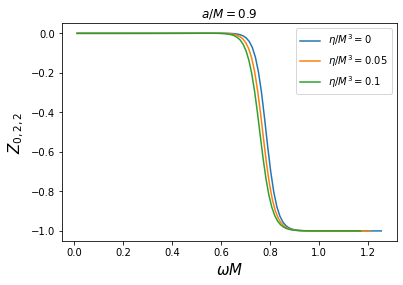

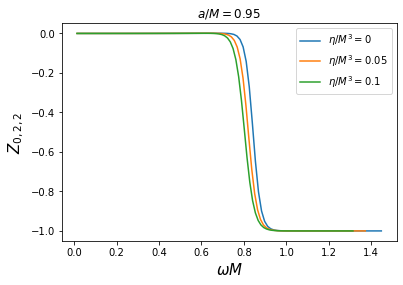

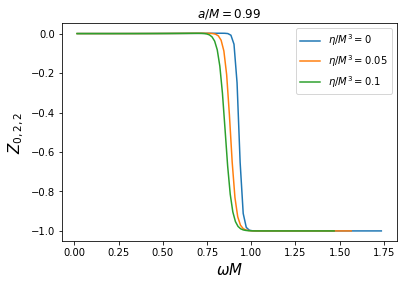

In [5]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode022.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

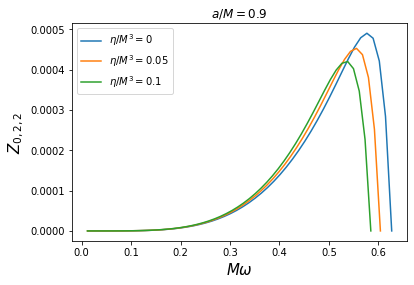

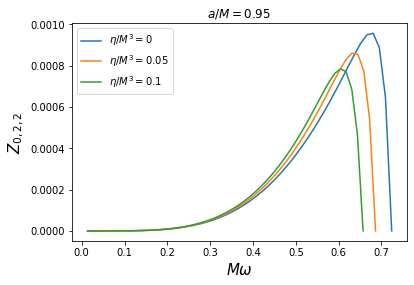

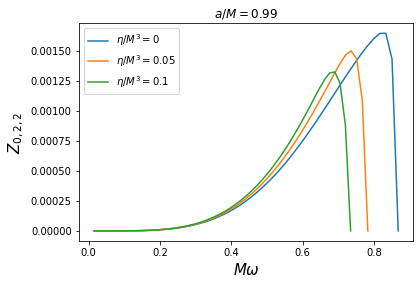

In [6]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode022.select_data_eta(eta, mode022.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode022.s, mode022.l, mode022.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

## Spectra for the s=0, l=2, m=1 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

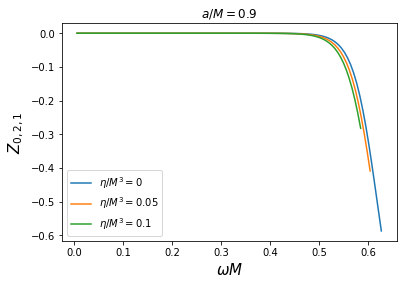

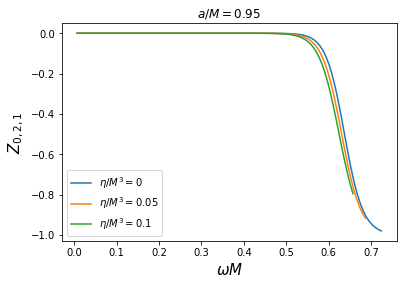

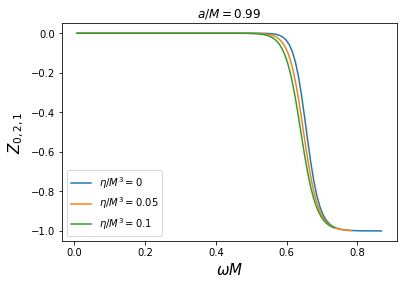

In [7]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode021.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

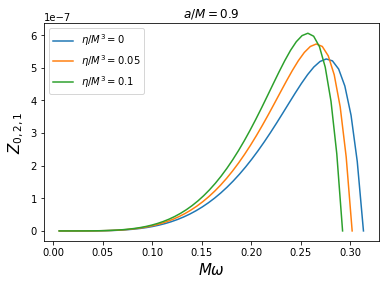

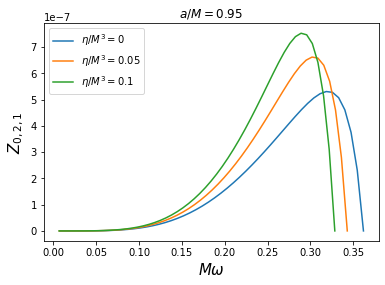

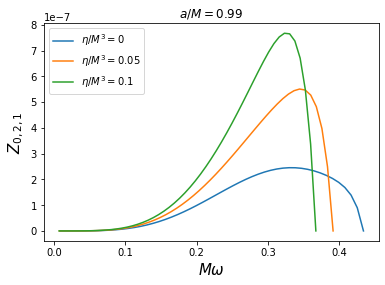

In [8]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode021.select_data_eta(eta, mode021.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode021.s, mode021.l, mode021.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

## 1.2 Electromagnetic waves

Import the s=1 data:

In [9]:
mode111 = AmplificationFactors(1, 1, 1)
mode122 = AmplificationFactors(1, 2, 2)
mode121 = AmplificationFactors(1, 2, 1)

## Spectra for the s=1, l=1, m=1 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

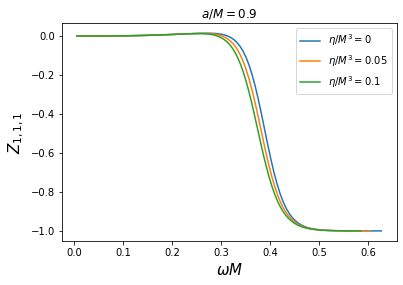

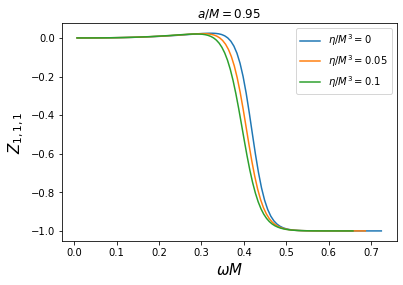

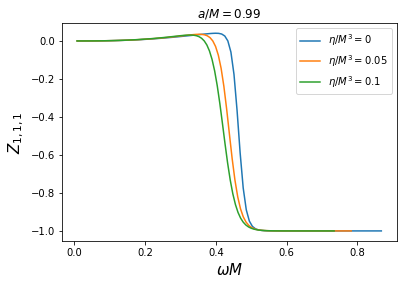

In [10]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode111.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

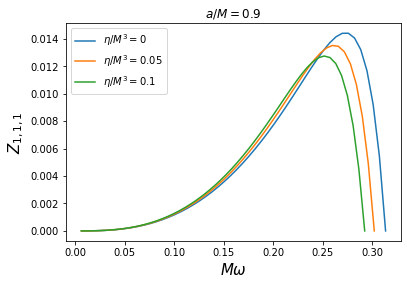

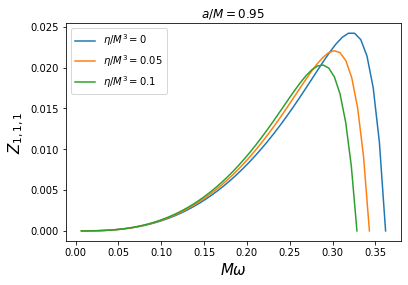

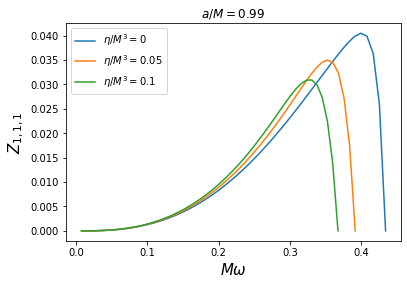

In [11]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode111.select_data_eta(eta, mode111.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode111.s, mode111.l, mode111.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

## Spectra for the s=1, l=2, m=2 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

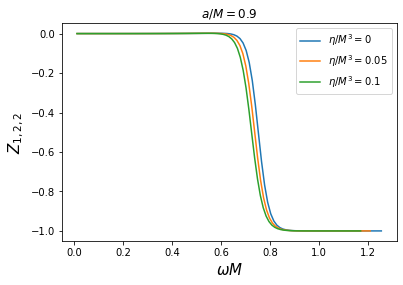

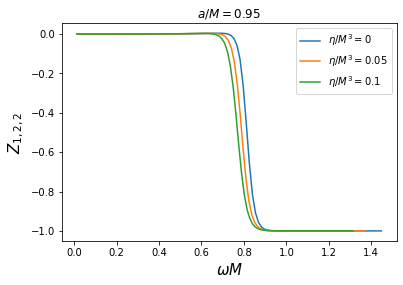

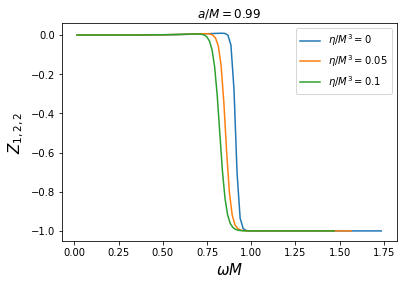

In [12]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode122.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

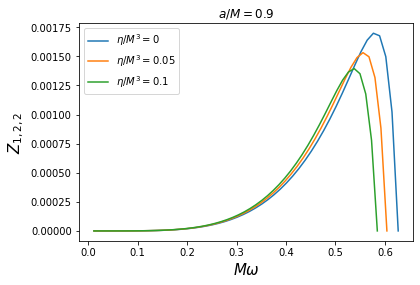

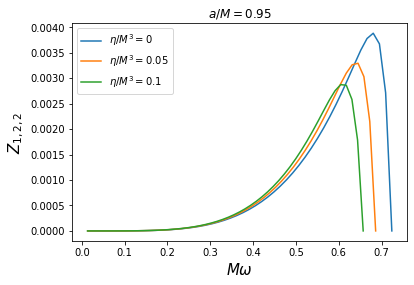

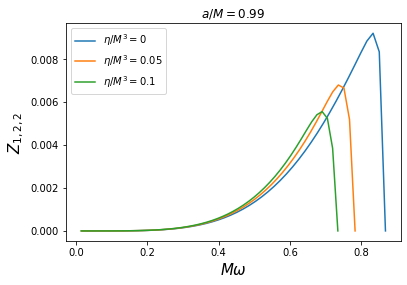

In [13]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode122.select_data_eta(eta, mode122.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode122.s, mode122.l, mode122.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

## Spectra for the s=1, l=2, m=1 mode

We plot spectra for a/M = 0.9, 0.95, 0.99 and &eta;/M<sup>3</sup> = 0, 0.05, 0.1.

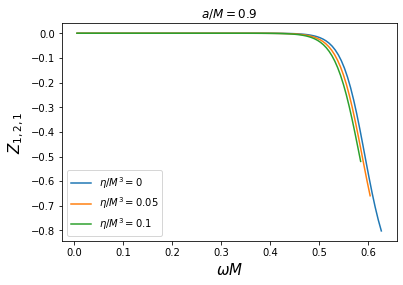

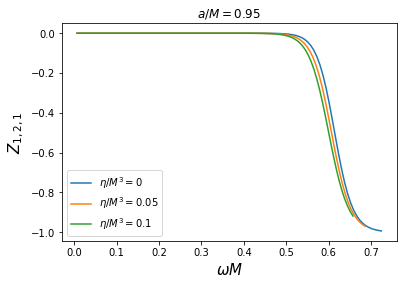

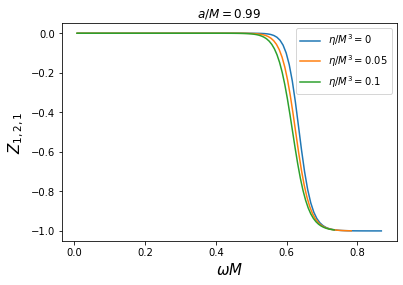

In [14]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        ax = mode121.plot_spectra(ax, a, eta)
    ax.set_title("$a/M = %g$" % a)
    ax.legend()

plt.show()

Zoom in the superradiant region

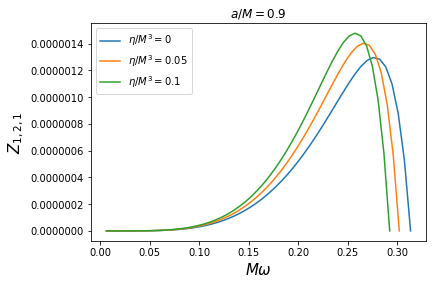

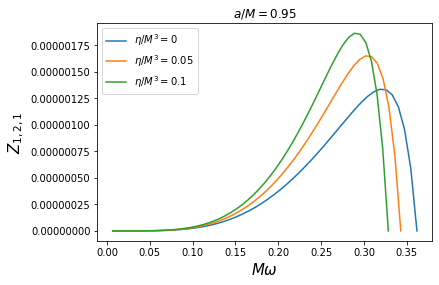

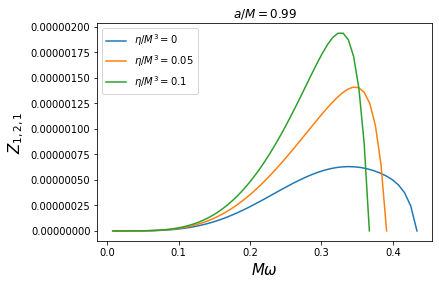

In [15]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0, 0.05, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for eta in eta_to_plot:
        df = mode121.select_data_eta(eta, mode121.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$\eta/M^3 = %g$" % eta)
    ax.set_title("$a/M = %g$" % a)
    ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode121.s, mode121.l, mode121.m), fontsize = 15)
    ax.set_xlabel("$M\omega$", fontsize = 15)
    ax.legend()

plt.show()

## 1.3 Hierarchy among different superradiant modes

We compare the spectra for different modes to show the hierarchy among them, for fixed values of the spin and deformation parameter, a/M = 0.99 and &eta;/M<sup>3</sup> = 0.05.

### Scalar waves

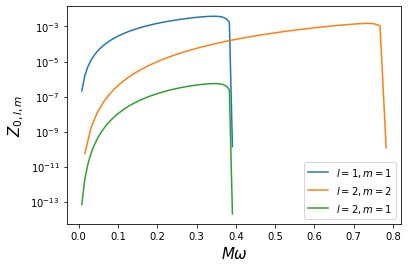

In [16]:
a = 0.99
eta = 0.05

fig, ax = plt.subplots()
df = mode011.select_data_eta(eta, mode011.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 1, m = 1$")
df = mode022.select_data_eta(eta, mode022.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 2, m = 2$")
df = mode021.select_data_eta(eta, mode021.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 2, m = 1$")
ax.set_yscale("log")
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{0,l,m}$", fontsize = 15)
ax.legend()

plt.show()

From the above plot we see that the l=m=1 mode is the dominant one.

### Electromagnetic waves

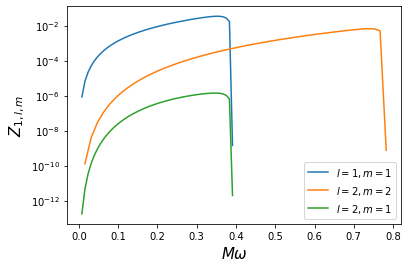

In [17]:
a = 0.99
eta = 0.05

fig, ax = plt.subplots()
df = mode111.select_data_eta(eta, mode111.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 1, m = 1$")
df = mode122.select_data_eta(eta, mode122.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 2, m = 2$")
df = mode121.select_data_eta(eta, mode121.select_data_spin(a))[0:50]
ax.plot(df["omega"], df["Z"], label = "$l = 2, m = 1$")
ax.set_yscale("log")
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{1,l,m}$", fontsize = 15)
ax.legend()

plt.show()

Even in this case the l=m=1 mode is the dominant one.

### Hierarchy between modes with different spin-weight s

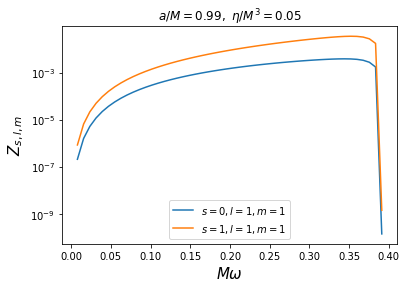

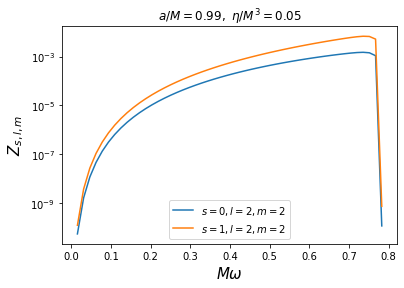

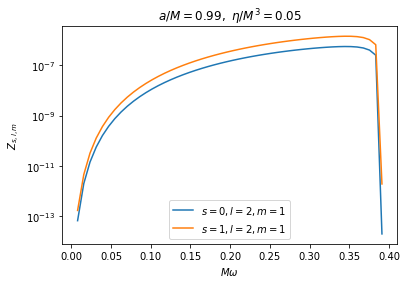

In [18]:
a = 0.99
eta = 0.05

fig1, ax1 = plt.subplots()
df = mode011.select_data_eta(eta, mode011.select_data_spin(a))[0:50]
ax1.plot(df["omega"], df["Z"], label = "$s = 0, l = 1, m = 1$")
df = mode111.select_data_eta(eta, mode111.select_data_spin(a))[0:50]
ax1.plot(df["omega"], df["Z"], label = "$s = 1, l = 1, m = 1$")
ax1.set_yscale("log")
ax1.set_xlabel("$M\omega$", fontsize = 15)
ax1.set_ylabel("$Z_{s,l,m}$", fontsize = 15)
ax1.set_title("$a/M = %g,\ \eta/M^3 = %g$" % (a, eta))
ax1.legend(loc = "lower center")

fig2, ax2 = plt.subplots()
df = mode022.select_data_eta(eta, mode022.select_data_spin(a))[0:50]
ax2.plot(df["omega"], df["Z"], label = "$s = 0, l = 2, m = 2$")
df = mode122.select_data_eta(eta, mode122.select_data_spin(a))[0:50]
ax2.plot(df["omega"], df["Z"], label = "$s = 1, l = 2, m = 2$")
ax2.set_yscale("log")
ax2.set_xlabel("$M\omega$", fontsize = 15)
ax2.set_ylabel("$Z_{s,l,m}$", fontsize = 15)
ax2.set_title("$a/M = %g,\ \eta/M^3 = %g$" % (a, eta))
ax2.legend(loc = "lower center")

fig3, ax3 = plt.subplots()
df = mode021.select_data_eta(eta, mode021.select_data_spin(a))[0:50]
ax3.plot(df["omega"], df["Z"], label = "$s = 0, l = 2, m = 1$")
df = mode121.select_data_eta(eta, mode121.select_data_spin(a))[0:50]
ax3.plot(df["omega"], df["Z"], label = "$s = 1, l = 2, m = 1$")
ax3.set_yscale("log")
ax3.set_xlabel("$M\omega$")
ax3.set_ylabel("$Z_{s,l,m}$")
ax3.set_title("$a/M = %g,\ \eta/M^3 = %g$" % (a, eta))
ax3.legend(loc = "lower center")

plt.show()

## 1.4 Superspinning black holes

Konoplya&ndash;Zhidenko black holes admit superspinning configurations, i.e. with a/M &ge; 1. We plot spectra for a/M = 0.99, 1.05, 1.1, 1.15 and &eta;/M<sup>3</sup> = 1.

### Scalar waves

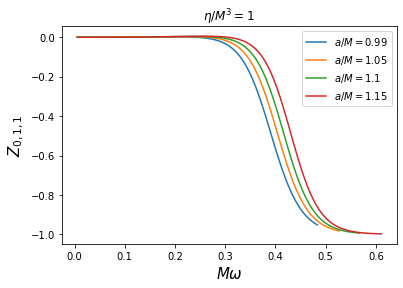

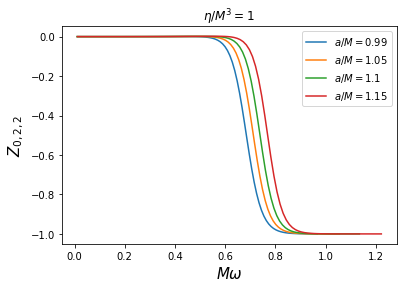

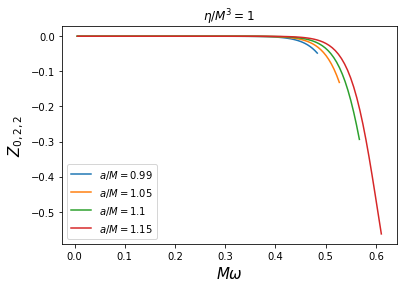

In [19]:
a_to_plot = [0.99, 1.05, 1.1, 1.15]
eta = 1

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode011.select_data_eta(eta, mode011.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode011.s, mode011.l, mode011.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode022.select_data_eta(eta, mode022.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode022.s, mode022.l, mode022.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode021.select_data_eta(eta, mode021.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode021.s, mode021.l, mode021.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

plt.show()

Zoom in the superradiant region

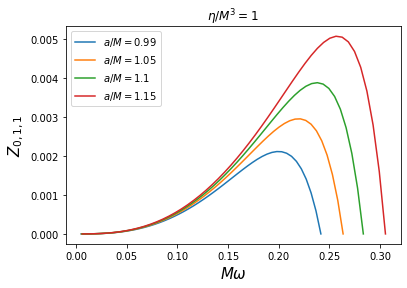

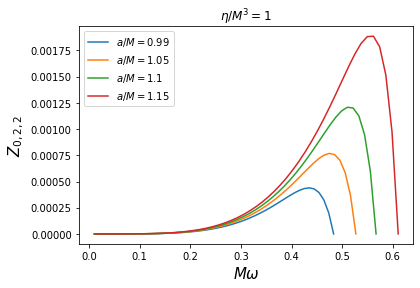

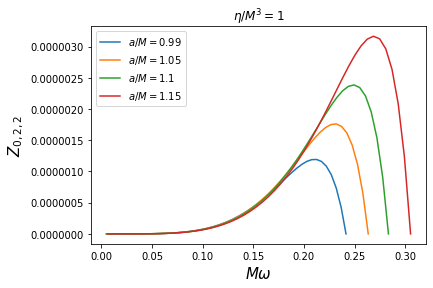

In [20]:
a_to_plot = [0.99, 1.05, 1.1, 1.15]
eta = 1

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode011.select_data_eta(eta, mode011.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode011.s, mode011.l, mode011.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode022.select_data_eta(eta, mode022.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode022.s, mode022.l, mode022.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode021.select_data_eta(eta, mode021.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode021.s, mode021.l, mode021.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

plt.show()

### Electromagnetic waves

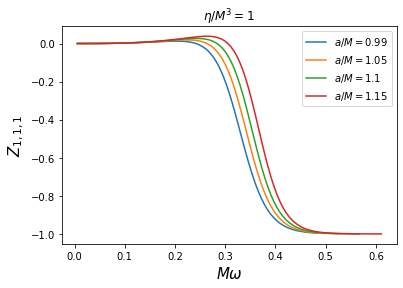

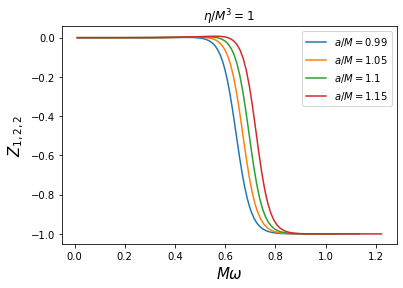

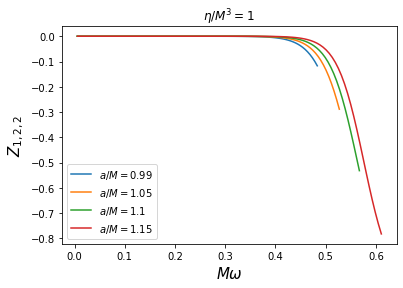

In [21]:
a_to_plot = [0.99, 1.05, 1.1, 1.15]
eta = 1

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode111.select_data_eta(eta, mode111.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode111.s, mode111.l, mode111.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode122.select_data_eta(eta, mode122.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode122.s, mode122.l, mode122.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode121.select_data_eta(eta, mode121.select_data_spin(a))
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode121.s, mode121.l, mode121.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

plt.show()

Zoom in the superradiant region

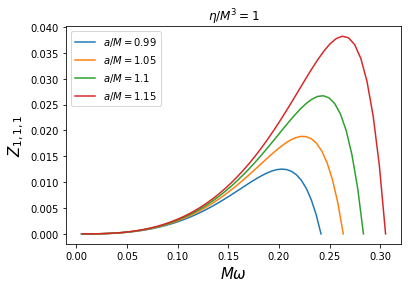

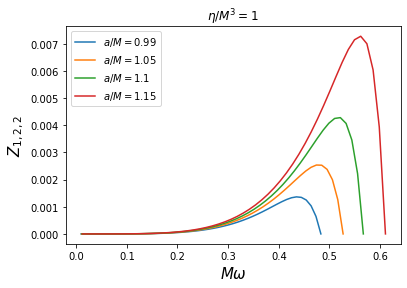

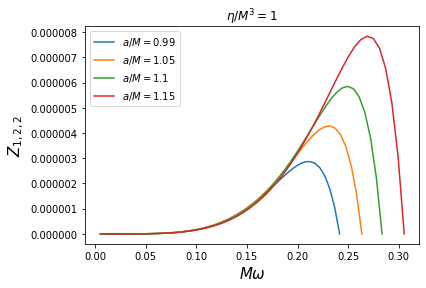

In [22]:
a_to_plot = [0.99, 1.05, 1.1, 1.15]
eta = 1

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode111.select_data_eta(eta, mode111.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode111.s, mode111.l, mode111.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode122.select_data_eta(eta, mode122.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode122.s, mode122.l, mode122.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

fig, ax = plt.subplots()
for a in a_to_plot:
    df = mode121.select_data_eta(eta, mode121.select_data_spin(a))[0:50]
    ax.plot(df["omega"], df["Z"], label = "$a/M = %g$" % a)
ax.legend()
ax.set_xlabel("$M\omega$", fontsize = 15)
ax.set_ylabel("$Z_{%g,%g,%g}$" % (mode121.s, mode121.l, mode121.l), fontsize = 15)
ax.set_title("$\eta/M^3 = %g$" % eta)

plt.show()

The above plots show that the amplification factors and the superradiant threshold can grow (in principle indefinitely) with the spin parameter a/M, and so the superradiant effect can be strongly enhanced with respect to the Kerr case.

## 1.5 Maximum of the amplification factor as a function of the deformation parameter &eta;

We plot the maximum of the amplification factor as a function of &eta;/M<sup>3</sup> for a = 0.97, 0.98, 0.99, 0.998 for the three superradiant modes.

## Scalar waves

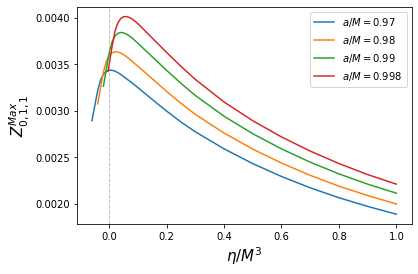

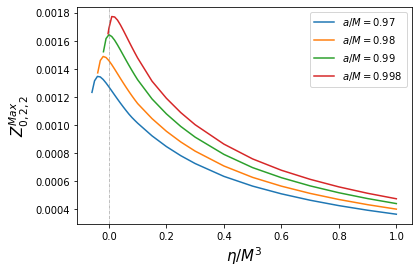

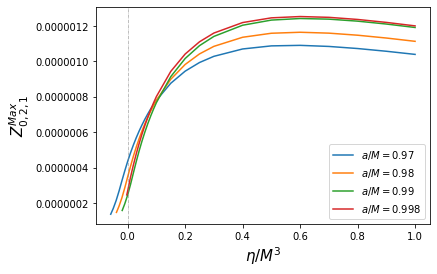

In [23]:
a_to_plot = [0.97, 0.98, 0.99, 0.998]

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode011.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode022.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode021.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

plt.show()

## Electromagnetic waves

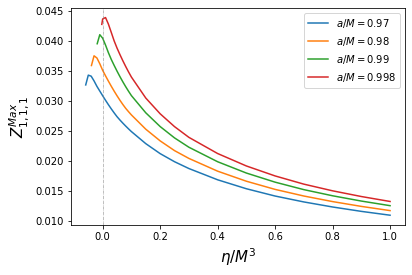

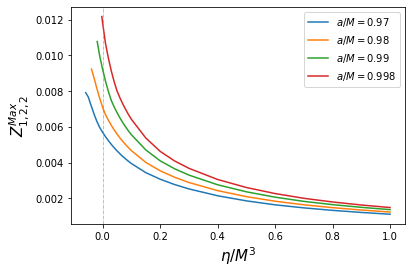

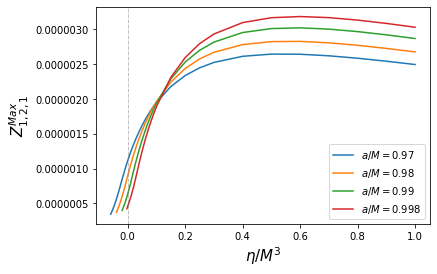

In [24]:
a_to_plot = [0.97, 0.98, 0.99, 0.998]

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode111.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode122.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode121.plot_Zmax(ax, a)
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
ax.legend()

plt.show()

The plots above show that the maximum amplification factor can be higher than in the Kerr case. For l=m=1 modes, Z<span><sup>Max</sup><sub>s,1,1</sub></span> has a peak for small values of &eta;, and the amplification factor can be ~10% greater than the Kerr analogous.

## 1.6 Integral of the amplification factor in the superradiant region

To quantify how superradiant these deformed black hole are with respect to a Kerr black hole with the same spin, it is helpful to study the integral of the amplification factor over the superradiant region, defined by I<sub>s,l,m</sub> = &int;<sub>0</sub><sup>m&Omega;<sub>0</sub></sup> Z<sub>s,l,m</sub> d&omega;.

We plot the quantity I<sub>s,l,m</sub> as a function of &eta;/M<sup>3</sup> for a/M = 0.8, 0.9, 0.95, 0.99.

### Scalar waves

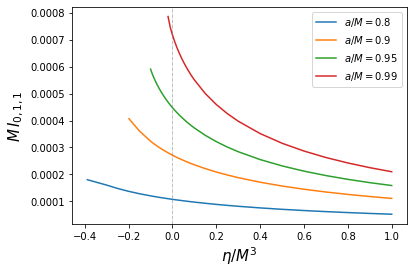

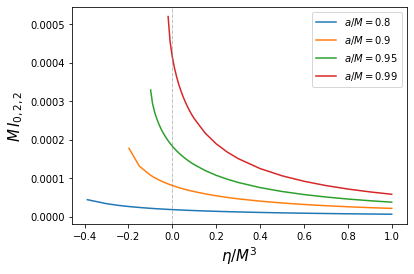

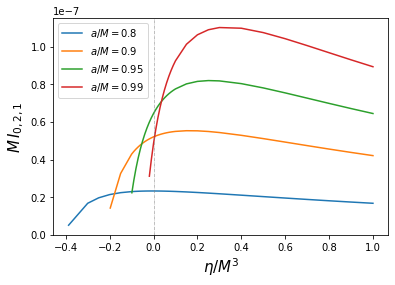

In [25]:
a_to_plot = [0.8, 0.9, 0.95, 0.99]

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode011.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode022.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode021.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

plt.show()

### Electromagnetic waves

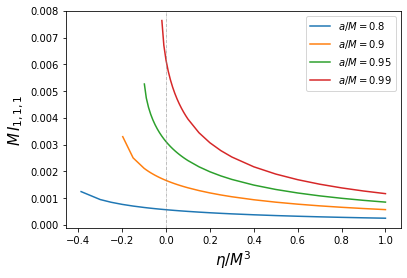

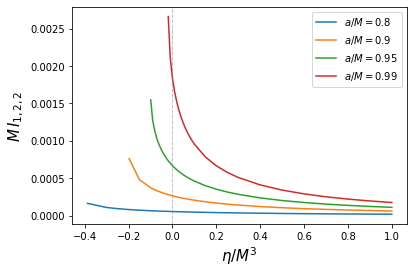

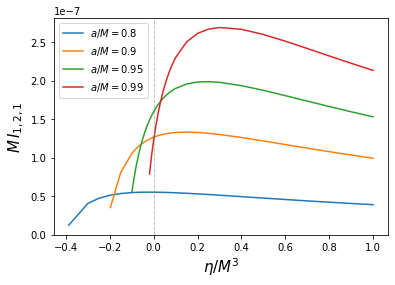

In [26]:
a_to_plot = [0.8, 0.9, 0.95, 0.99]

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode111.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode122.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

fig, ax = plt.subplots()
for a in a_to_plot:
    ax = mode121.plot_integral(ax, a)
ax.legend()
plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")

plt.show()

The above plots show that the quantity M I<sub>s,l,m</sub> for l=m is smaller (greater) than in the Kerr case for positive (negative) values of the deformation parameter &eta;/M<sup>3</sup>, meaning that superradiance is generally suppressed (enhanced) in the Konoplya&ndash;Zhidenko spacetime with respect to the general relativitic case.

On the contrary, for l=2 and m=1, the integral M I<sub>s,2,1</sub> can be greater than its Kerr values for positive values of &eta;/M<sup>3</sup>, though this mode is hierarchically smaller than the l=m ones, see section [1.3](#1.3-Hierarchy-among-different-superradiant-mode).

# 2. Amplification factors for massive scalar waves

Massive data are organised as

| a/M | &eta;/M<sup>3</sup> | M &mu; | M &omega; | Z |
|-----|---------------------|--------|-----------|---|
|...|...|...|...|...|

where M, a and &eta; are the mass, the spin parameter and the deformation parameter of the black hole; &mu; and &omega; are the mass parameter and the frequency of the scalar wave, and Z the amplification factor.

We give data for the dominanant s=0, l=1, m=1 mode and values of the spin parameter a/M = {0.9, 0.95, 0.99}.
For each value of a/M we give values of &eta;/M<sup>3</sup> in the range [&eta;<sub>-</sub>/M<sup>3</sup>,1] as in the [massless case](#1.-Amplification-factors-for-massless-bosonic-waves) and M &mu; = {0.025, 0.05, &hellip;} as long as &mu; < &Omega;<sub>0</sub>, being &Omega;<sub>0</sub> the angular velocity at the event horizon.

Frequency values are in the range [&mu; and stop at 2&Omega;<sub>0</sub>-&mu;].

## 2.1 Spectra for the s=0, l=1, m=1 mode

Import the data:

In [27]:
m_mode011 = AmplificationFactors(0, 1, 1, massive = True)

We plot spectra for a/M = 0.9, 0.95, 0.99, &eta;/M<sup>3</sup> = 0.05, and M &mu; = 0.025, 0.05, 0.075, 0.1.

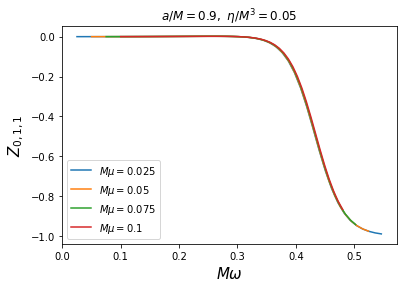

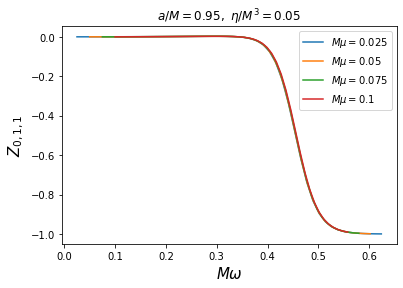

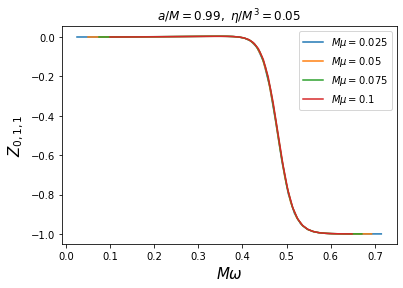

In [28]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0.05]
mu_to_plot = [0.025, 0.05, 0.075, 0.1]

for a in a_to_plot:
    for eta in eta_to_plot:
        fig = plt.figure()
        ax = fig.add_subplot()
        for mu in mu_to_plot:
            m_mode011.plot_spectra(ax, a, eta, mu)
        ax.set_title("$a/M = %g,\ \eta/M^3 = %g$" % (a, eta))
        ax.legend()

plt.show()

The above spectra look almost degenerate, but a zoom in the superradiant region shows the differences

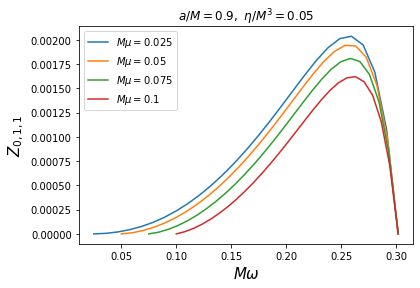

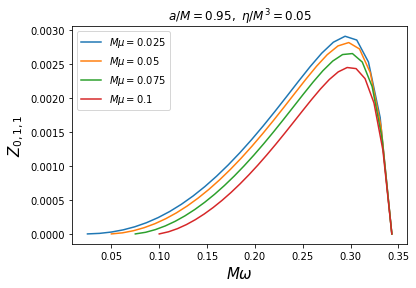

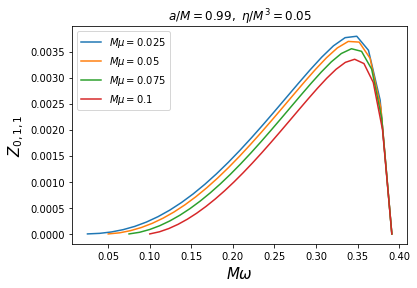

In [29]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [0.05]
mu_to_plot = [0.025, 0.05, 0.075, 0.1]

for a in a_to_plot:
    fig = plt.figure()
    ax = fig.add_subplot()
    for eta in eta_to_plot:
        for mu in mu_to_plot:
            df = m_mode011.select_data_eta(eta, m_mode011.select_data_mu(mu, m_mode011.select_data_spin(a)))[0:27]
            ax.plot(df["omega"], df["Z"], label = "$M\mu = %g$" % mu)
        ax.set_xlabel("$M\omega$", fontsize = 15)
        ax.set_ylabel("$Z_{0,1,1}$", fontsize = 15)
        ax.set_title("$a/M = %g,\ \eta/M^3 = %g$" % (a, eta))
        ax.legend()

plt.show()

## 2.2 Maximum of the amplification factor as a function of the deformation parameter &eta;

We plot the maximum of the amplification factor as a function of &eta;/M<sup>3</sup> for a = 0.9, 0.95, 0.99, and M &mu; = 0.025, 0.05, 0.075, 0.1.

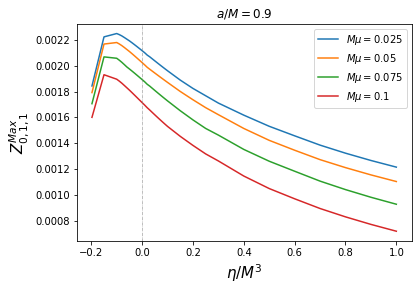

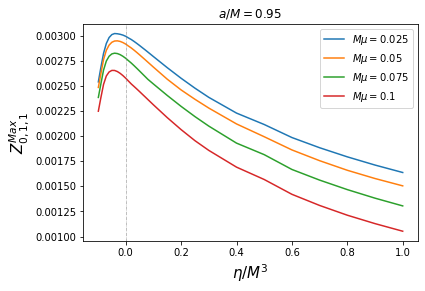

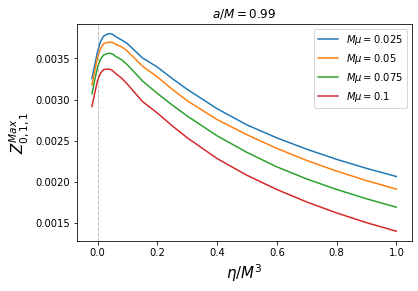

In [30]:
a_to_plot = [0.9, 0.95, 0.99]
mu_to_plot = [0.025, 0.05, 0.075, 0.1]

for a in a_to_plot:
    fig, ax = plt.subplots()
    ax.set_title("$a/M = %g$" % a)
    for mu in mu_to_plot:
        ax = m_mode011.plot_Zmax(ax, a, mu)
    plt.axvline(x = 0, linewidth = 0.5, color = "grey", linestyle = "-.")
    ax.legend()

plt.show()

# 3. Degeneracy of superradiant spectra for scalar waves

In sections [1.1](#1.1-Scalar-waves), [1.2](#1.2-Electromagnetic-waves) and [2.1](#2.1-Spectra-for-the-s=0,-l=1,-m=1-mode) we have shown that the spectra can look very similar when comparing a Kerr black hole and a Konoplya&ndash;Zhidenko black hole with a small deformation parameter, as well as a massless scalar and a massive scalar with very small mass parameter.

In addition, there might be a “degeneracy” when comparing the spectra of a massless scalar off a slightly deformed black hole with the spectra of a little massive scalar off a Kerr black hole. Our criterion for degenerate spectra is when both the maximum value of the amplification factor, its corresponding frequency, its integral I<sub>s,l,m</sub> and the threshold frequency are the same within a tolerance of 5%.
We plot some examples of this degeneracy for a/M = 0.9, 0.95, 0.99.

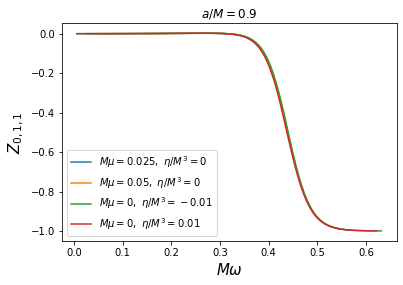

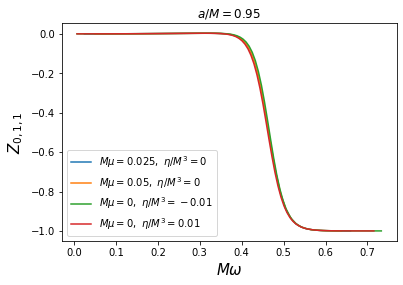

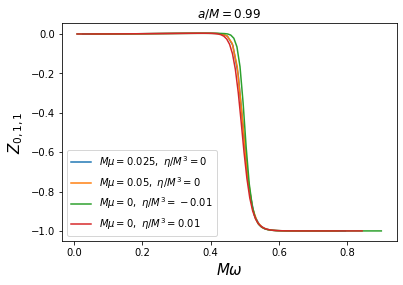

In [31]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [-0.01, 0.01]
mu_to_plot = [0.025, 0.05]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for mu in mu_to_plot:
        df = m_mode011.select_data_eta(0, m_mode011.select_data_mu(mu, m_mode011.select_data_spin(a)))
        ax.plot(df["omega"], df["Z"], label = "$M\mu = %g,\ \eta/M^3 = %g$" % (mu, 0))
    for eta in eta_to_plot:
        df = mode011.select_data_eta(eta, mode011.select_data_spin(a))
        ax.plot(df["omega"], df["Z"], label = "$M\mu = %g,\ \eta/M^3 = %g$" % (0, eta))
        ax.set_title("$a/M = %g$" % a)
        ax.set_xlabel("$M\omega$", fontsize = 15)
        ax.set_ylabel("$Z_{0,1,1}$", fontsize = 15)
        ax.legend()

plt.show()

Zoom in the superradiant region

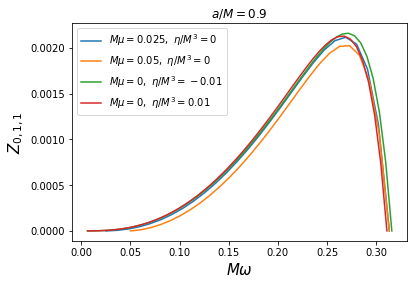

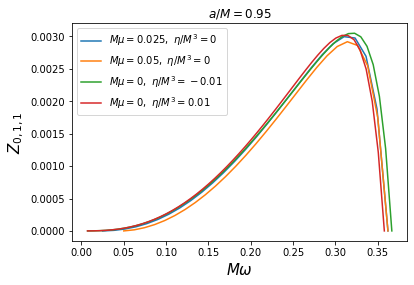

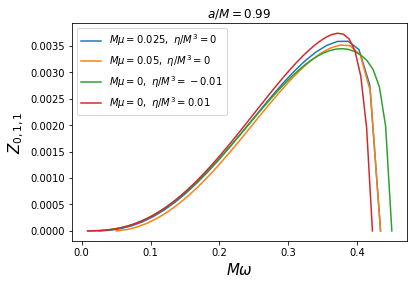

In [32]:
a_to_plot = [0.9, 0.95, 0.99]
eta_to_plot = [-0.01, 0.01]
mu_to_plot = [0.025, 0.05]

for a in a_to_plot:
    fig, ax = plt.subplots()
    for mu in mu_to_plot:
        df = m_mode011.select_data_eta(0, m_mode011.select_data_mu(mu, m_mode011.select_data_spin(a)))[0:27]
        ax.plot(df["omega"], df["Z"], label = "$M\mu = %g,\ \eta/M^3 = %g$" % (mu, 0))
    for eta in eta_to_plot:
        df = mode011.select_data_eta(eta, mode011.select_data_spin(a))[0:50]
        ax.plot(df["omega"], df["Z"], label = "$M\mu = %g,\ \eta/M^3 = %g$" % (0, eta))
        ax.set_title("$a/M = %g$" % a)
        ax.set_xlabel("$M\omega$", fontsize = 15)
        ax.set_ylabel("$Z_{0,1,1}$", fontsize = 15)
        ax.legend()

plt.show()